In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfs = [pd.read_csv(f"Datos/acople_final\Run{i}_list.txt", delim_whitespace=True, skiprows=9, names=["Brd", "Ch", "LG", "HG", "Tstamp_us", "TrgID", "NHits"], engine="python") for i in range(1,6)]
dfs[0]

,Brd,Ch,LG,HG,Tstamp_us,TrgID,NHits
0,1,0,27,-,8785.784,0.0,64.0
1,1,1,30,-,NaN,NaN,NaN
2,1,2,34,-,NaN,NaN,NaN
3,1,3,35,-,NaN,NaN,NaN
4,1,4,26,-,NaN,NaN,NaN
...,...,...,...,...,...,...,...
526011,0,59,4066,-,NaN,NaN,NaN
526012,0,60,3998,-,NaN,NaN,NaN
526013,0,61,242,-,NaN,NaN,NaN
526014,0,62,250,-,NaN,NaN,NaN


In [ ]:
# Escoger archivo de lectura
k = 3
df = dfs[k]

In [ ]:
#Filtrar disparos por matriz
df0 = df[df['Brd'] == 0]
df1 = df[df['Brd'] == 1]

# Elimina los vacios y se resta los tiempos de los disparos respecto al primero, tambien se resetea el indice
df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df0 = round((df0["Tstamp_us"].dropna()- df0["Tstamp_us"].dropna()[0])/1,10)
df1 = round((df1["Tstamp_us"].dropna()- df1["Tstamp_us"].dropna()[0])/1,10)

df0, df1

(0         0.000000e+00
 64        9.999976e+03
 128       1.999994e+04
 192       2.999990e+04
 256       3.999988e+04
               ...     
 397568    5.996982e+07
 397632    5.997982e+07
 397696    5.998982e+07
 397760    5.999437e+07
 397824    5.999982e+07
 Name: Tstamp_us, Length: 6217, dtype: float64,
 0         0.000000e+00
 64        9.999984e+03
 128       2.000003e+04
 192       3.000001e+04
 256       3.999990e+04
               ...     
 397568    5.996986e+07
 397632    5.997986e+07
 397696    5.998986e+07
 397760    5.999440e+07
 397824    5.999986e+07
 Name: Tstamp_us, Length: 6217, dtype: float64)

Diferencia de tiempos en disparos entre matrices

Text(0, 0.5, '|Δt| [μs]')

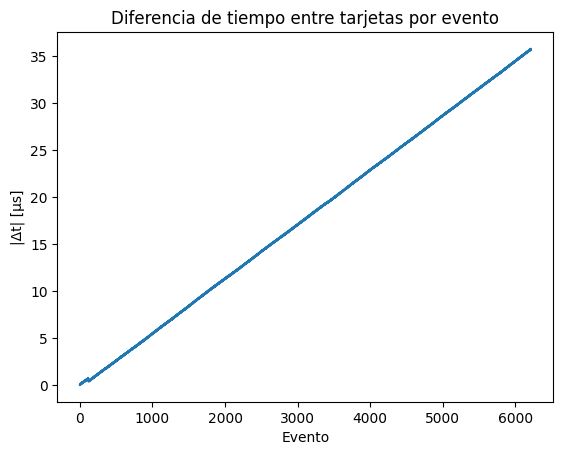

In [9]:
base = np.zeros_like(df0)
for i in range(len(df0)) :
    base[i] = i
plt.plot(base,df1 - df0)
plt.title("Diferencia de tiempo entre tarjetas por evento")
plt.xlabel("Evento")
plt.ylabel("|Δt| [μs]")